# Eigenanalysis

In the previous section, we looked at how to construct the covariance matrix, **C**. Recall that **C** is defined as follows:

$$
\mathbf{C} = \frac{1}{M-1} \mathbf{X^TX}
$$

where **X** is size [*M x N*] and **C** is size [*N x N*].

Principal Component Analysis (PCA) consists of an **eigenanalysis** of C. So, now we need to familiarize ourselves with eigenanalysis, the process of finding the eigenvalues and eigenvectors of a matrix.

Let's first write down the mathematical definition of eigenvectors and eigenvalues for a symmetric matrix **C**. Any symmetric matrix C can be decomposed in the following way:

$$
\begin{align}
\mathbf{Ce_i} &= \lambda_i\mathbf{e_i}\\
\mathbf{CE} &= \mathbf{E\Lambda}\\
\end{align}
$$

where **E** is the matrix with eigenvectors, $\mathbf{e_i}$, as its columns and $\mathbf{\Lambda}$ is the matrix with eigenvalues, $\lambda_i$, along its diagonal and zeros on the off-diagonals. Note that the eigenvectors are [*unit* vectors](https://www.khanacademy.org/math/precalculus/x9e81a4f98389efdf:vectors/x9e81a4f98389efdf:unit-vec/v/intro-unit-vector-notation).

The set of eigenvectors and associated eigenvalues represent a coordinate transformation into a coordinate space where **C** becomes diagonal.

#### Interpretation:

* Because the covariance matrix is diagonal in this new coordinate space, the variations in these new directions are uncorrelated with each other, i.e., the columns are linearly independent.

* The eigenvectors define directions in the initial coordinate space along which the maximum possible variance can be explained, and in which variance in one direction is orthogonal to the variance explained by other directions defined by the other eigenvectors. 

* The eigenvalues indicate how much variance is explained by each eigenvector.

Let's take a look at an example to help us interpret the meaning of eigenvectors and eigenvalues. We will conduct an eigenanalysis of the covariance matrix of **A**, where **A** is a simple 2 *x* 2 matrix:

$$
\mathbf{A} = \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
$$

In [1]:
# define matrix A: each inner list represents a column of the matrix
A = [[1, -1],[-1, 1]]
print(A)

[[1, -1], [-1, 1]]


If each column of **A** represents a vector in 2-D space, we can plot these columns in the 2-D plane as follows:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import matplotlib as mpl
mpl.rc('font',size=14) #set default font size for plots

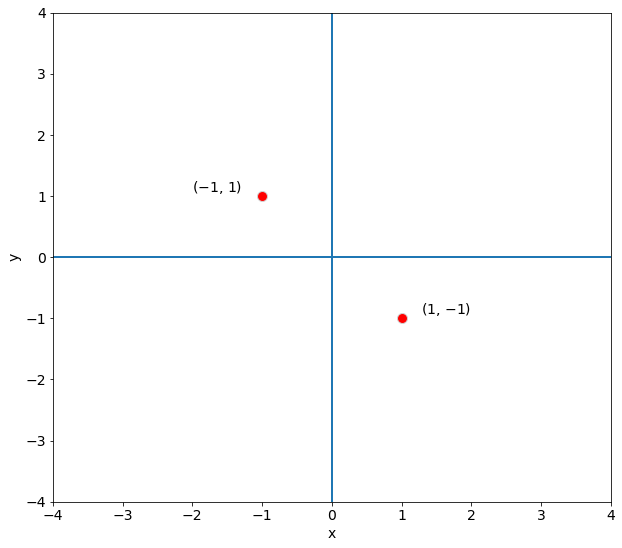

In [3]:
# plotting parameters
FS = 14
inc = -1

# plot columns of A on 2-D plane
plt.figure(figsize=(10,9))
plt.plot(A[0],A[1], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')

# label each point
txt_str = r"($" + str(A[0][0]) + r"$, $" + str(A[0][1]) + r"$)"
plt.text(A[0][0]-inc, A[1][0], txt_str, color = 'black', 
         fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(A[1][0]) + r"$, $" + str(A[1][1]) + r"$)"
plt.text(A[0][1]+inc, A[1][1], txt_str, color = 'black',
         fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

plt.axvline(0,linewidth = 2)
plt.axhline(0,linewidth = 2)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y') 

plt.show()

Each red dot in the plot above corresponds to the coordinates of a column of A represented in the 2-D plane.

Now, let's compute the covariance matrix of **A**:

$$
\begin{align}
\mathbf{C} &= \frac{1}{2-1} \mathbf{A^TA}\\
&= \mathbf{A^TA}\\
& = \begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}
\begin{bmatrix}
1 & -1 \\
-1 & 1
\end{bmatrix}\\
& = \begin{bmatrix}
2 & -2 \\
-2 & 2
\end{bmatrix}
\end{align}
$$

We are not going to spend too much time learning how to solve for eigenvectors and eigenvalues in this course - we are going to let python do that for us - but, one can show that the sole eigenvector of the covaiance matrix of **A** is,

$$
\mathbf{e_1} = \begin{bmatrix}
\sqrt{2}/2 \\
-\sqrt{2}/2
\end{bmatrix}
$$

We can check this by plugging the eigenvector into the equation above, namely,  

$$
\mathbf{Ce_1} = \lambda_1\mathbf{e_1}
$$

and rearrangling to show show that it is satisfied:

$$
\begin{bmatrix}
2 & -2 \\
-2 & 2
\end{bmatrix}
\begin{bmatrix}
\sqrt{2}/2 \\
-\sqrt{2}/2
\end{bmatrix} = 4 \begin{bmatrix}
\sqrt{2}/2 \\
-\sqrt{2}/2
\end{bmatrix}
$$

Note that $\lambda_1$ = 4 for this to be true. It turns out that $\sum \lambda_i$= the total variance of **A**, that is, the sum of the diagonal of the covariance matrix **C** which is 4. 

In this problem, there is only one non-zero eigenvalue (i.e., $\lambda_2$ = 0), so, the first eigenvector explains *all of the variance of* **A**. 

In python we can compute the covariance matrix as follows:

In [4]:
#compute the covariance matrix
C = np.cov(A, rowvar = False)
print(C)

[[ 2. -2.]
 [-2.  2.]]


And, we can find the eigenvectors and eigenvalues of a matrix using the `numpy.linalg.eig` package:

In [5]:
# find eigenvalues (LAM) and eigenvectors (E) of C
LAM, E = linalg.eig(C)

In [6]:
# eigenvectors
print(E)

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


We get two eigenvectors, $\mathbf{e_1} = [\sqrt{2}/2, -\sqrt{2}/2]$ and $\mathbf{e_2} = [\sqrt{2}/2, \sqrt{2}/2]$ but only $\mathbf{e_1}$, non-zero eigenvalue:

In [7]:
print(LAM)

[4.0000000e+00 4.4408921e-16]


Thus, the vector space that the basis of eigenvectors of **C** spans is a simple line. Let's add this line to our plot below.

NameError: name 'mult_fact' is not defined

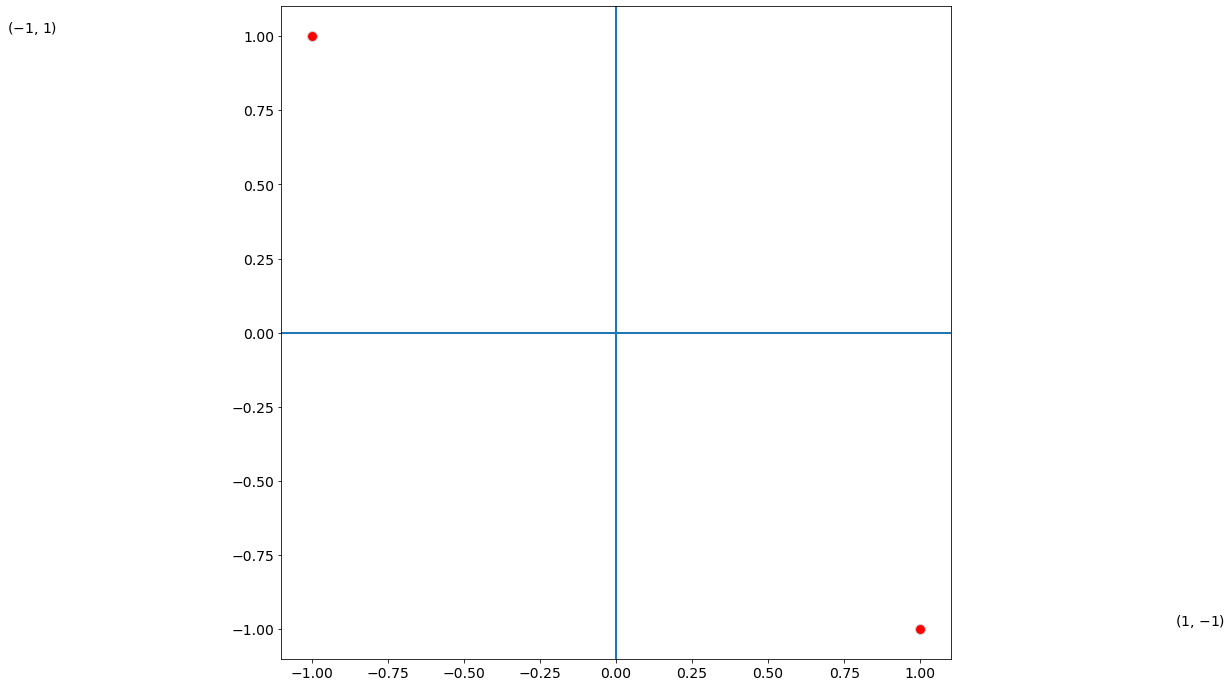

In [8]:
# plotting parameters
FS = 14
inc = -1
mult_fac = 15

# plot columns of A on 2-D plane
plt.figure(figsize=(12,12))
plt.plot(A[0],A[1], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')

# label each point
txt_str = r"($" + str(A[0][0]) + r"$, $" + str(A[0][1]) + r"$)"
plt.text(A[0][0]-inc, A[1][0], txt_str, color = 'black', 
         fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(A[1][0]) + r"$, $" + str(A[1][1]) + r"$)"
plt.text(A[0][1]+inc, A[1][1], txt_str, color = 'black',
         fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

plt.axvline(0,linewidth = 2)
plt.axhline(0,linewidth = 2)

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'k')

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y') 

plt.show()

The dashed black line in the plot above, delineates the line for which our eigenvector forms a basis. Any point along this line can be expressed using the eigenvector. Thus, all the variance in **A** can be explained by this one eigenvector.

We can perform a *change of basis*, to convert **A** into the basis of eigenvectors by multiplying **A** and **E**.

In [146]:
# change of basis: use np.dot to perform matrix multiplication
A_new = np.dot(A,E)
print(A_new)

[[-0.18480123  1.4020872 ]
 [ 0.18480123 -1.4020872 ]
 [-0.34449733 -2.25639571]]


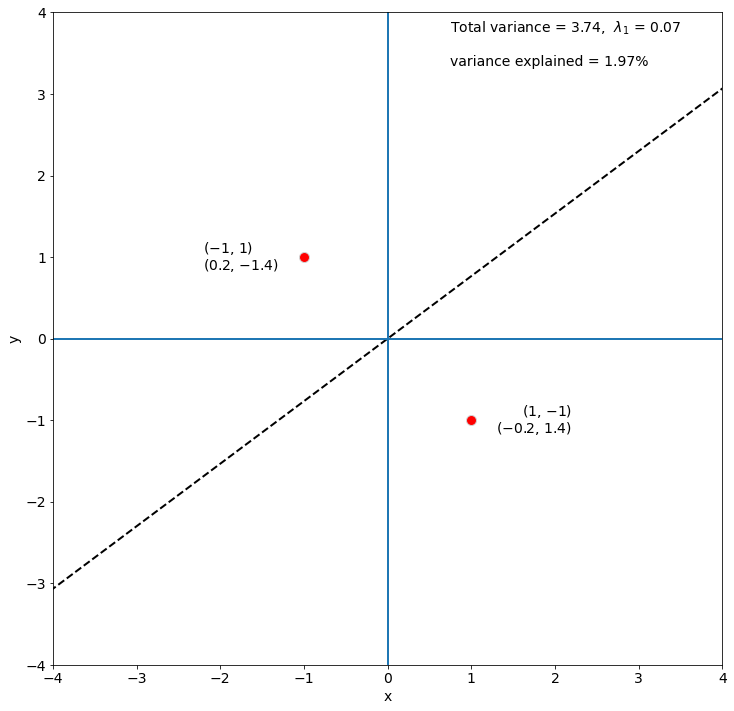

In [147]:
# plotting parameters
FS = 14
inc = -1.2
mult_fac = 15

# plot columns of A on 2-D plane
plt.figure(figsize=(12,12))
plt.plot(A[0],A[1], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')

txt_str = r"($" + str(A[0][0]) + r"$, $" + str(A[0][1]) + r"$)"
plt.text(A[0][0]-inc, A[1][0], txt_str, color = 'black', 
         fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')
txt_str = r"($" + str(np.round(A_new[0][0],1)) + r"$, $" + str(np.round(A_new[0][1],1)) + r"$)"
plt.text(A[0][0]-inc, A[1][0], txt_str, color = 'k', 
         fontsize = FS, horizontalalignment = 'right', verticalalignment = 'top')

txt_str = r"($" + str(A[1][0]) + r"$, $" + str(A[1][1]) + r"$)"
plt.text(A[0][1]+inc, A[1][1], txt_str, color = 'black',
         fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')
txt_str = r"($" + str(np.round(A_new[1][0],1)) + r"$, $" + str(np.round(A_new[1][1],1)) + r"$)"
plt.text(A[0][1]+inc, A[1][1], txt_str, color = 'k',
         fontsize = FS, horizontalalignment = 'left', verticalalignment = 'top')

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.75,'Total variance = ' + str(np.round(np.sum(LAM),2)) + ',  $\lambda_1$ = ' + str(np.round(LAM[0],2)), color = 'k', fontsize = 14)

var_exp = 100.*LAM[0]/np.sum(LAM)
plt.text(.75,3.35,'variance explained = ' + str(np.round(var_exp,2)) + '%', color = 'k', fontsize = 14)

plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.xlabel('x')
plt.ylabel('y')    

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'k')

plt.axvline(0,linewidth = 2)
plt.axhline(0,linewidth = 2)

Before we move on, let's talk a bit more about how eigenanalysis is actually done (without python). Using our example of the covariance matrix, the eigenvectors and eigenvalues are solved for in the following way:

$$
\begin{align}
\mathbf{Ce_i} &= \lambda_i\mathbf{e_i}\\
\mathbf{Ce_i} - \lambda_i\mathbf{e_i} & = 0\\
(\mathbf{C} - \lambda_i\mathbf{I})\mathbf{e_i} & = 0\\
\end{align}
$$

Thus, the eigenvector, $\mathbf{e_i}$, lies in the null-space of $(\mathbf{C} - \lambda_i\mathbf{I})$.

$(\mathbf{C} - \lambda_i\mathbf{I})$ only has a null-space if it is singular, i.e., if det$(\mathbf{C} - \lambda_i\mathbf{I})$ = 0. 

Solving this is known as an *eigenvalue problem* and shows up frequently in engineering and science applications.

For this 2-D case, we can compute the determinant and solve for the $\lambda_i$'s as follows:

$$
\begin{align}
\text{det}(\mathbf{C} - \lambda_i\mathbf{I}) & = \text{det}\left( \begin{bmatrix}
2 - \lambda & -2 \\
-2 & 2 - \lambda
\end{bmatrix}\right)\\
& = (2 - \lambda)(2 - \lambda) - 4\\
& = \lambda(\lambda - 4)\\
& = 0
\end{align}
$$

So, we have two solutions, $\lambda_1$= 4 and $\lambda_2$ = 0. Just like we found using python! Once, we have our eigenvalues, then we can solve for the eigenvectors:

$$
\begin{align}
\mathbf{Ce_1} &= \lambda_1\mathbf{e_1}\\
(\mathbf{C} - \lambda_1\mathbf{I})\mathbf{e_1} & = 0\\ 
\begin{bmatrix}
2 - \lambda_1 & -2 \\
-2 & 2 - \lambda_1 \end{bmatrix}\mathbf{e_1} & = 0\\
\begin{bmatrix}
2 - 4 & -2 \\
-2 & 2 - 4 \end{bmatrix}\mathbf{e_1} & = 0\\
\begin{bmatrix}
-2 & -2 \\
-2 & -2 \end{bmatrix}\begin{bmatrix}
e_{11} \\
e_{21} \end{bmatrix} & = 0\\
\end{align}
$$

In order to satisfy the above equation, $\mathbf{e_1}$, must be some vector that lies along the line [1,-1] and the unit vector that corresponds to this is $[\sqrt{2}/2, -\sqrt{2}/2]$.

#### A few properties of eigenvectors and eigenvalues:

* The eigenvalues $\lambda_i$ are positive for a real, symmetric matrix **C**. 

* The eigenvectors of a matrix form a linearly independent set.

* In general, if **C** has dimensions $[M x M]$, then there will be $M$ eigenvalues and $M$ eigenvectors. This is true unless **C** is degenerate, in which case, there will be only $r$ eigenvalues and eigenvectors (where $r$ is the rank of the matrix).

* If **C** ($[M x M]$) has full rank, the eigenvectors form a basis for **R**$^M$. 

* If C is singular with rank $r$ = $k$, the first $k$ eigenvectors span the subspace of C (**R**$^k$), the last $k$ + 1:$M$ eigenvectors span the null-space of **C**

* If **C** is real and symmetric, the eigenvectors are not only linearly independent, they are also orthogonal (perpendicular).

The example that we worked through above had a nice simple solution. Let's modify this example a bit by adding a column to **A** and see how the solution changes.

$$
\mathbf{A} = \begin{bmatrix}
1 & -1 & -1.1\\
-1 & 1 & 2
\end{bmatrix}
$$


In [126]:
# redefine A 
A = [[1, -1],[-1, 1],[-1.1,2]]
print(A)

[[1, -1], [-1, 1], [-1.1, 2]]


Next, we compute the covariance matrix of **A**,

In [148]:
# find eigenvalues and eigenvectors of covariance matrix of A
C = np.cov(A, rowvar = False)
print(C)

[[ 1.40333333 -1.73333333]
 [-1.73333333  2.33333333]]


We can then find the eigenvalues and eigenvectors of **C** in order to define a new set of linearly independent basis vectors that best describe the variance in **A**.

In [149]:
# solve the eigenvalue problem
LAM, E = linalg.eig(C)
print(LAM)

[0.07371097 3.6629557 ]


We get two, non-zero eigenvalues and their corresponding eigenvectors,

In [150]:
print(E)

[[-0.79344421  0.60864298]
 [-0.60864298 -0.79344421]]


As before, we can find the coordinates of A in the new vector space spanned by the eigenvectors.

In [152]:
# change of basis
A_new = np.dot(A,E)

Now, let's plot the coordinates corresponding to the columns of **A** and the eigenvectors. 

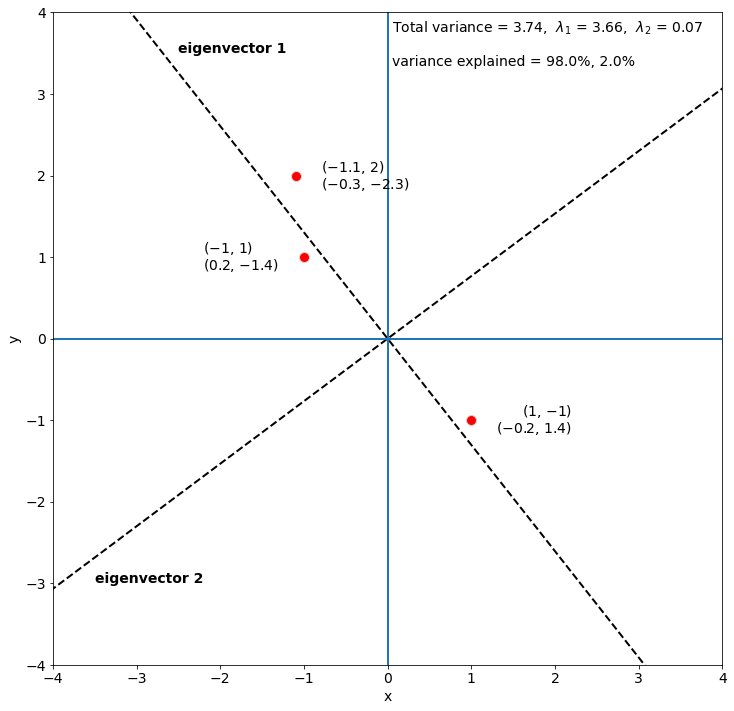

In [154]:
# plotting parameters
FS = 14
inc = -1.2
mult_fac = 15

plt.figure(figsize=(12,12))
plt.plot(A[0][0],A[1][0], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')
plt.plot(A[1][0],A[1][1], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')
plt.plot(A[2][0],A[2][1], marker = 'o', linestyle = '', markersize = 10, color = 'r',markeredgecolor = 'lightgray')


plt.xlim(-4, 4)
plt.ylim(-4, 4)

plt.plot([E[0,0]*-mult_fact, E[0,0]*mult_fact],[E[-1,0]*-mult_fact, E[-1,0]*mult_fact],linestyle = '--', linewidth = 2, color = 'k')
plt.plot([E[0,1]*-mult_fact, E[0,1]*mult_fact],[E[-1,1]*-mult_fact, E[-1,1]*mult_fact],linestyle = '--', linewidth = 2, color = 'k')

txt_str = r"($" + str(A[0][0]) + r"$, $" + str(A[0][1]) + r"$)"
plt.text(A[0][0]-inc, A[0][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'bottom')

txt_str = r"($" + str(A[1][0]) + r"$, $" + str(A[1][1]) + r"$)"
plt.text(A[1][0]+inc, A[1][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')

txt_str = r"($" + str(A[2][0]) + r"$, $" + str(A[2][1]) + r"$)"
plt.text(A[2][0]-inc/4, A[2][1], txt_str, color = 'black', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'bottom')



txt_str = r"($" + str(round(A_new[0][0],1)) + r"$, $" + str(round(A_new[0][1],1)) + r"$)"
plt.text(A[0][0]-inc, A[0][1], txt_str, color = 'k', fontsize = FS, horizontalalignment = 'right',verticalalignment = 'top')

txt_str = r"($" + str(round(A_new[1][0],1)) + r"$, $" + str(round(A_new[1][1],1)) + r"$)"
plt.text(A[1][0]+inc, A[1][1], txt_str, color ='k', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')

txt_str = r"($" + str(round(A_new[2][0],1)) + r"$, $" + str(round(A_new[2][1],1)) + r"$)"
plt.text(A[2][0]-inc/4, A[2][1], txt_str, color ='k', fontsize = FS, horizontalalignment = 'left',verticalalignment = 'top')


plt.text(.05,3.75,'Total variance = ' + str(np.round(np.sum(LAM),2)) + ',  $\lambda_1$ = ' + str(np.round(LAM[1],2))+ ',  $\lambda_2$ = ' + str(np.round(LAM[0],2)), color = 'k', fontsize = 14)


var_exp = 100.*LAM[0]/np.sum(LAM)
var_exp2 = 100.*LAM[1]/np.sum(LAM)
plt.text(.05,3.35,'variance explained = ' + str(np.round(var_exp2,1)) + '%, ' + str(np.round(var_exp,1)) + '%', color = 'k', fontsize = 14)


plt.text(-3.5, -3, "eigenvector 2", color = 'k', fontsize = FS, fontweight = 'bold')   
plt.text(-2.5, 3.5, "eigenvector 1", color ='k', fontsize = FS, fontweight = 'bold')      

plt.xlabel('x')
plt.ylabel('y')    

plt.axvline(0,linewidth = 2)
plt.axhline(0,linewidth = 2)

We can see that most of the variance in **A** is explained by the first eigenvector, 98\%, while the second eigenvector only explains 2\% of the variance.

Here's a fun example of using eigenanalysis to explore dominant patterns of variability in fashion photos, "[eigenstyle](https://medium.com/hackerati/eigenstyle-8c52cc979029
)".

In the next section, we will look at how we can identify patterns of variability in climate and geophysical data sets using eigenanalysis.